## Mohammed AL-Sayed Agoor     --- G7

----

## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20,50)
y = -1 * X + 2 

In [3]:
X = X.reshape(-1,1) 
X =  np.insert(arr=X, obj=0, values=1, axis=1)

#### Plot your data points. 

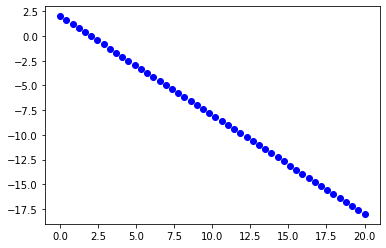

In [4]:
plt.scatter(X[:,1], y, c='b');

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
thetas_batch = np.zeros(2)

In [6]:
def batch_GD(X, y, theta_input, alfa, iters):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    for i in range(iters):
        
        h_theta = X @ theta_input
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        theta_input = theta_input - alfa * gradient
        
        
        # append in array
        theta_other = theta_input
        cost_steps[i] = cost
        theta_steps[i] = theta_other
        
    # return thetas final , thetas steps for each iteration , cost steps for each iteration
    return theta_input, theta_steps, cost_steps      

In [7]:
thetas_final, thetas_steps, cost_steps = batch_GD(X, y, thetas_batch, alfa=0.01, iters=1000)

In [8]:
print('thetas_final :', thetas_final)

thetas_final : [ 1.84130185 -0.98819541]


In [9]:
print('thetas_steps :', thetas_steps)

thetas_steps : [[-0.08       -1.14693878]
 [-0.04450612 -0.74102124]
 [-0.04995894 -0.88539916]
 ...
 [ 1.84048567 -0.9881347 ]
 [ 1.84089428 -0.9881651 ]
 [ 1.84130185 -0.98819541]]


In [10]:
final_vals_batch = thetas_final[0] + thetas_final[1] * X[:,1]
final_vals_batch

array([  1.84130185,   1.43795678,   1.03461171,   0.63126665,
         0.22792158,  -0.17542349,  -0.57876855,  -0.98211362,
        -1.38545869,  -1.78880376,  -2.19214882,  -2.59549389,
        -2.99883896,  -3.40218402,  -3.80552909,  -4.20887416,
        -4.61221923,  -5.01556429,  -5.41890936,  -5.82225443,
        -6.22559949,  -6.62894456,  -7.03228963,  -7.4356347 ,
        -7.83897976,  -8.24232483,  -8.6456699 ,  -9.04901496,
        -9.45236003,  -9.8557051 , -10.25905017, -10.66239523,
       -11.0657403 , -11.46908537, -11.87243043, -12.2757755 ,
       -12.67912057, -13.08246564, -13.4858107 , -13.88915577,
       -14.29250084, -14.6958459 , -15.09919097, -15.50253604,
       -15.90588111, -16.30922617, -16.71257124, -17.11591631,
       -17.51926137, -17.92260644])

In [11]:
score_batch = r2_score(y, final_vals_batch)
print('score_batch :', score_batch)

score_batch : 0.9998130177293859


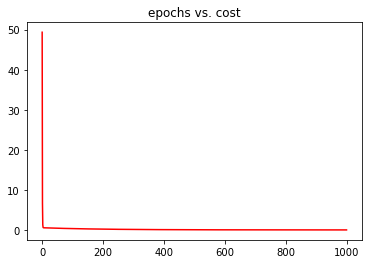

In [12]:
epochs = np.arange(1000)
plt.plot(epochs, cost_steps, c='r')
plt.title('epochs vs. cost');

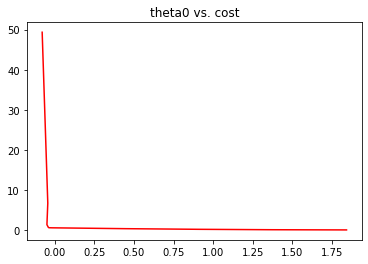

In [13]:
plt.plot(thetas_steps[:,0], cost_steps, c='r')
plt.title('theta0 vs. cost');

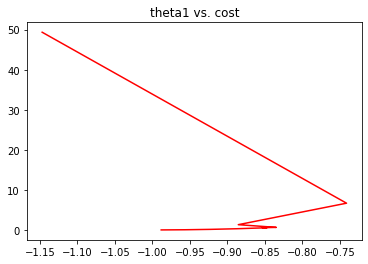

In [14]:
plt.plot(thetas_steps[:,1], cost_steps, c='r')
plt.title('theta1 vs. cost');

In [15]:
def predict_each_line(theta_steps):
    
    predict_each = []
    
    for i in range(len(theta_steps)):
        final_vals = theta_steps[i,0] * X[:,0] + theta_steps[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

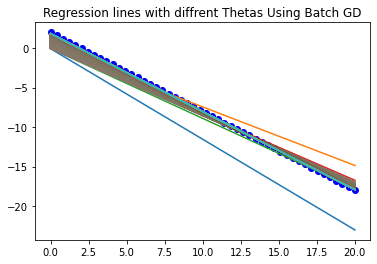

In [16]:
def plot_lines(theta_steps):
    
    predict_each = predict_each_line(theta_steps)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas Using Batch GD');
        
plot_lines(thetas_steps)
plt.scatter(X[:,1], y, c='b');

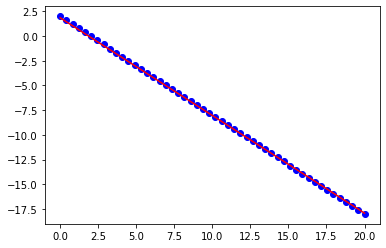

In [17]:
plt.scatter(X[:,1], y, c='b')
plt.plot(X[:,1], final_vals_batch, c='r');

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

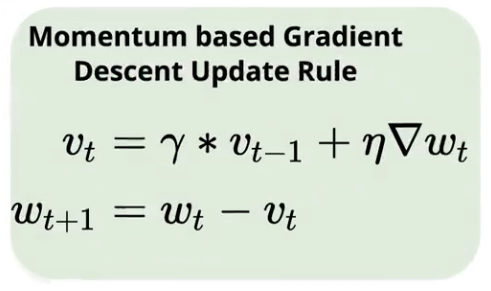

#### γ takes values between 0 and 1.
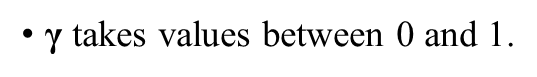

In [18]:
theta_moment = np.zeros(2)

In [19]:
def momentum_based_GD(X, y, theta_moment, alfa, iters, gamma):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    for i in range(iters):
        h_theta = X @ theta_moment
        loss = h_theta - y
        cost = np.sum(loss**2)/(2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = gamma * vt + alfa * gradient      
        theta_moment = theta_moment - vt
        
        # append in arrays
        theta_trmpor = theta_moment
        cost_steps[i] = cost
        theta_steps[i] = theta_trmpor
        
        
    return theta_moment, theta_steps, cost_steps

In [20]:
theta_moment_final, theta_steps_moment, cost_steps_moment = momentum_based_GD(X, y, theta_moment, alfa=0.01, iters=1000, gamma=0.9)

In [21]:
print('theta_moment_final :', theta_moment_final)

theta_moment_final : [ 2. -1.]


In [22]:
print('theta_steps_moment :', theta_steps_moment)

theta_steps_moment : [[-0.08       -1.14693878]
 [-0.11650612 -1.77326614]
 [-0.05086996 -1.08376801]
 ...
 [ 2.         -1.        ]
 [ 2.         -1.        ]
 [ 2.         -1.        ]]


In [23]:
final_vals_moment = theta_moment_final[0] + theta_moment_final[1] * X[:,1]
final_vals_moment

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

In [24]:
score_moment = r2_score(y, final_vals_moment)
print('score_moment :', score_moment)   
# exctly one get exactly the solution under these conditions :D

score_moment : 1.0


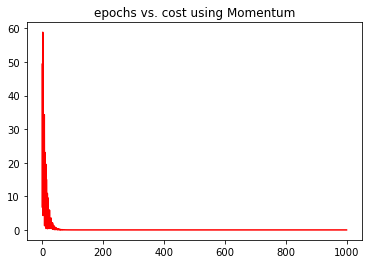

In [25]:
epochs = np.arange(1000)
plt.plot(epochs, cost_steps_moment, c='r')
plt.title('epochs vs. cost using Momentum');

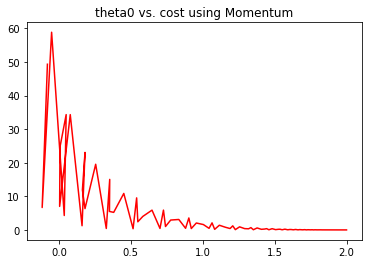

In [26]:
plt.plot(theta_steps_moment[:,0], cost_steps_moment, c='r')
plt.title('theta0 vs. cost using Momentum');

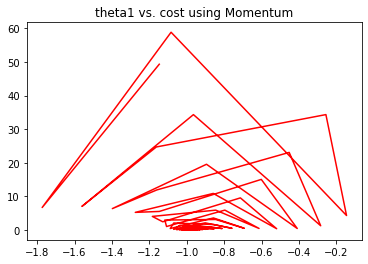

In [27]:
plt.plot(theta_steps_moment[:,1], cost_steps_moment, c='r')
plt.title('theta1 vs. cost using Momentum');

In [28]:
def predict_each_line_moment(theta_steps):
    
    predict_each = []
    
    for i in range(len(theta_steps)):
        final_vals = theta_steps[i,0] * X[:,0] + theta_steps[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

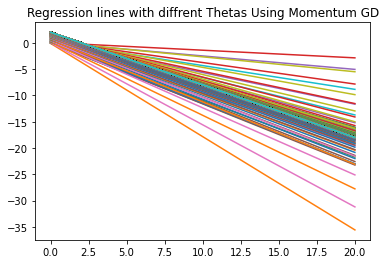

In [29]:
def plot_lines(theta_steps):
    
    predict_each = predict_each_line(theta_steps)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas Using Momentum GD');
        
plot_lines(theta_steps_moment)

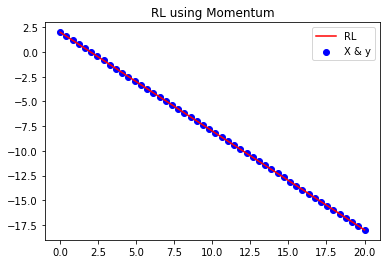

In [30]:
plt.scatter(X[:,1], y, c='b', label='X & y')
plt.plot(X[:,1], final_vals_moment, c='r', label='RL')
plt.title('RL using Momentum')
plt.legend()
plt.show()

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

$$ gamma = 0.99 .... increse Momentum$$ 

In [31]:
# gamma = 0.99 almost == 1
theta_moment_final2, theta_steps_moment2, cost_steps_moment2 = momentum_based_GD(X, y, theta_moment, alfa=0.01, iters=1000, gamma=0.99)

In [32]:
print('theta_moment_final2 using gamma = 0.99 :', theta_moment_final2)

theta_moment_final2 using gamma = 0.99 : [ 1.9862602  -1.00321509]


In [33]:
values_momentum2 = theta_moment_final2[0] + theta_moment_final2[1] * X[:,1]
values_momentum2

array([  1.9862602 ,   1.57678465,   1.16730911,   0.75783356,
         0.34835802,  -0.06111753,  -0.47059307,  -0.88006862,
        -1.28954416,  -1.69901971,  -2.10849525,  -2.5179708 ,
        -2.92744634,  -3.33692189,  -3.74639743,  -4.15587298,
        -4.56534852,  -4.97482407,  -5.38429961,  -5.79377516,
        -6.2032507 ,  -6.61272625,  -7.02220179,  -7.43167734,
        -7.84115289,  -8.25062843,  -8.66010398,  -9.06957952,
        -9.47905507,  -9.88853061, -10.29800616, -10.7074817 ,
       -11.11695725, -11.52643279, -11.93590834, -12.34538388,
       -12.75485943, -13.16433497, -13.57381052, -13.98328606,
       -14.39276161, -14.80223715, -15.2117127 , -15.62118824,
       -16.03066379, -16.44013933, -16.84961488, -17.25909042,
       -17.66856597, -18.07804152])

In [34]:
score_moment2 = r2_score(y, values_momentum2)
print('score_moment2 :', score_moment2)  

# score is almost the same
# i can conclude that here the best parameters is using momentum with
# alfa=0.01, iters=1000, gamma=0.9#

score_moment2 : 0.9999289622405094


$$ gamma = 0.0  ..... neglecting Momentum$$

In [35]:
# gamma = 0 
theta_moment_final3, theta_steps_moment3, cost_steps_moment3 = momentum_based_GD(X, y, theta_moment, alfa=0.01, iters=1000, gamma=0)

In [36]:
print('theta_moment_final3 :', theta_moment_final3)

theta_moment_final3 : [ 1.84130185 -0.98819541]


In [37]:
values_momentum3 = theta_moment_final3[0] + theta_moment_final3[1] * X[:,1]
values_momentum3

array([  1.84130185,   1.43795678,   1.03461171,   0.63126665,
         0.22792158,  -0.17542349,  -0.57876855,  -0.98211362,
        -1.38545869,  -1.78880376,  -2.19214882,  -2.59549389,
        -2.99883896,  -3.40218402,  -3.80552909,  -4.20887416,
        -4.61221923,  -5.01556429,  -5.41890936,  -5.82225443,
        -6.22559949,  -6.62894456,  -7.03228963,  -7.4356347 ,
        -7.83897976,  -8.24232483,  -8.6456699 ,  -9.04901496,
        -9.45236003,  -9.8557051 , -10.25905017, -10.66239523,
       -11.0657403 , -11.46908537, -11.87243043, -12.2757755 ,
       -12.67912057, -13.08246564, -13.4858107 , -13.88915577,
       -14.29250084, -14.6958459 , -15.09919097, -15.50253604,
       -15.90588111, -16.30922617, -16.71257124, -17.11591631,
       -17.51926137, -17.92260644])

In [38]:
score_moment3 = r2_score(y, values_momentum3)
print('score_moment3 :', score_moment3)  

# score is decreased and is equal to Batch GD at the same conditions

score_moment3 : 0.9998130177293859


### Update your Batch GD for one variable  implementation to be NAG and check your results

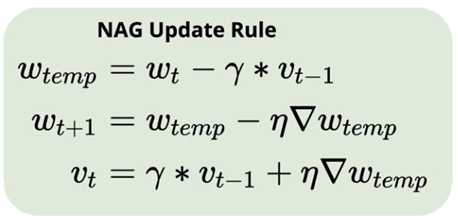

In [39]:
thetas_NAG = np.zeros(2)

In [40]:
def NAG_GD(X, y, thetas_nag, alfa, iters, gamma):
         
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    
    for i in range(iters):
                
        # get theta_temp
        thetas_temp = thetas_nag - gamma * vt
        
        # Note : I want to get gradient_temp not gradient_thetas_nag
        h_theta_temp = X @ thetas_temp
        loss_temp = h_theta_temp - y
        cost_temp = np.sum(loss_temp**2) / (2 * len(X))
        gradient_temp = (X.T @ loss_temp) / len(X)
        
        
        thetas_nag = thetas_temp - alfa * gradient_temp
        vt = gamma * vt + alfa * gradient_temp
        
        
        # append in arrays
        theta_tempor = thetas_nag
        cost_steps[i] = cost_temp
        theta_steps[i] = theta_tempor
               
    return thetas_nag, theta_steps, cost_steps

In [41]:
# using gamma = 0.9, alfa = 0.01
thetas_nag_final, theta_steps_nag, cost_steps_nag = NAG_GD(X, y, thetas_NAG, 0.01, 1000, gamma=0.9)

In [42]:
print('thetas_nag_final :', thetas_nag_final)

thetas_nag_final : [ 2.00009034 -0.99878544]


In [43]:
final_vals_nag = thetas_nag_final[0] + thetas_nag_final[1] * X[:,1]
final_vals_nag

array([  2.00009034,   1.59242282,   1.18475529,   0.77708776,
         0.36942024,  -0.03824729,  -0.44591482,  -0.85358234,
        -1.26124987,  -1.6689174 ,  -2.07658493,  -2.48425245,
        -2.89191998,  -3.29958751,  -3.70725503,  -4.11492256,
        -4.52259009,  -4.93025761,  -5.33792514,  -5.74559267,
        -6.15326019,  -6.56092772,  -6.96859525,  -7.37626278,
        -7.7839303 ,  -8.19159783,  -8.59926536,  -9.00693288,
        -9.41460041,  -9.82226794, -10.22993546, -10.63760299,
       -11.04527052, -11.45293805, -11.86060557, -12.2682731 ,
       -12.67594063, -13.08360815, -13.49127568, -13.89894321,
       -14.30661073, -14.71427826, -15.12194579, -15.52961331,
       -15.93728084, -16.34494837, -16.7526159 , -17.16028342,
       -17.56795095, -17.97561848])

In [44]:
score_nag = r2_score(y, final_vals_nag)
print('score_nag :', score_nag)

score_nag : 0.9999942094430034


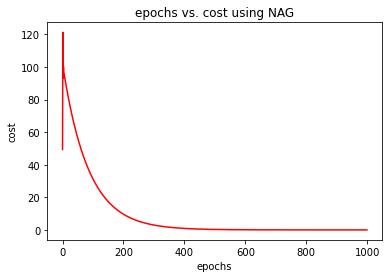

In [45]:
epochs = np.arange(1000)
plt.plot(epochs, cost_steps_nag, c='r')
plt.title('epochs vs. cost using NAG')
plt.xlabel('epochs')
plt.ylabel('cost');

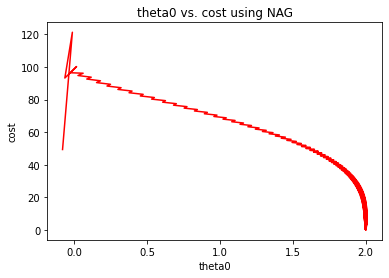

In [46]:
plt.plot(theta_steps_nag[:,0], cost_steps_nag, c='r')
plt.title('theta0 vs. cost using NAG')
plt.xlabel('theta0')
plt.ylabel('cost');

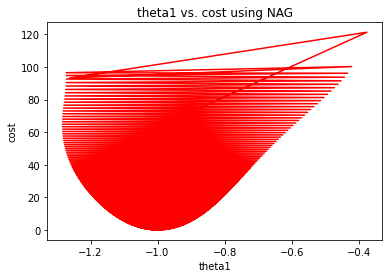

In [47]:
plt.plot(theta_steps_nag[:,1], cost_steps_nag, c='r')
plt.title('theta1 vs. cost using NAG')
plt.xlabel('theta1')
plt.ylabel('cost');

In [48]:
def predict_each_line_nag(theta_steps):
    
    predict_each = []
    
    for i in range(len(theta_steps)):
        final_vals = theta_steps[i,0] * X[:,0] + theta_steps[i,1] * X[:,1]
        predict_each.append(final_vals)
        
    predict_each = np.array(predict_each)
    return predict_each

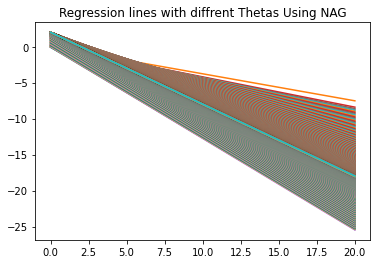

In [49]:
def plot_lines(theta_steps):
    
    predict_each = predict_each_line(theta_steps)
    for i in range (predict_each.shape[0]):
        
        plt.plot(X[:,1], predict_each[i])
        plt.title('Regression lines with diffrent Thetas Using NAG');
        
plot_lines(theta_steps_nag)

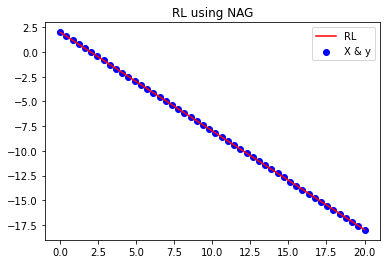

In [50]:
plt.scatter(X[:,1], y, c='b', label='X & y')
plt.plot(X[:,1], final_vals_nag, c='r', label='RL')
plt.title('RL using NAG')
plt.legend();

## Congratulations 
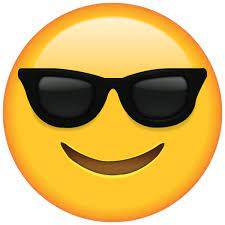